# Import libraries

In [465]:
import pandas as pd
import numpy as np

# Import the dataset from the link given in the question

In [466]:
data_rating = pd.read_csv('ratings.csv')

# Printing first 5 values of the dataset

In [467]:
data_rating.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Creating the nXp matrix for the rating

In [468]:
new_rating_data = np.zeros((610,9724))
original = list(data_rating['movieId'])
unique = list(dict.fromkeys(original))
#print(new_rating_data)
#print(new_rating_data.shape())
new = []
for number in original:
    new.append(unique.index(number))
#print(new)
data_rating['new_movieId'] = new
#print(data_rating)
for i in data_rating.iterrows():
    new_rating_data[int(i[1]['userId']-1)][int(i[1]['new_movieId'])] = i[1]['rating']
#print(new_rating_data)    

# Creating Indexes to form omega for Training and Testing

In [469]:
index_list = []
for i in range(new_rating_data.shape[0]):
    for j in range(new_rating_data.shape[1]):
        if(new_rating_data[i][j] != 0):
            index_list.append([i,j])
#index_list

# Split the indexes into 90% train and 10% test data

In [470]:
from sklearn.model_selection import train_test_split
index_list_train, index_list_test  = train_test_split(np.array(index_list),test_size = 0.1,random_state = 1)

# Generate u and v values using random function of numpy

In [471]:
U = np.random.randn(610,5)
V = np.random.randn(9724,5)

# Defining the gradient function derived for U

In [472]:
def gradient_wrt_u(m,lmda,u,v):
    gradient = np.dot(np.subtract(np.dot(u,v.T) , m) , v) + lmda * u
    return gradient

# Defining the gradient function derived for U

In [473]:
def gradient_wrt_v(m,lmda,u,v):
    gradient = np.dot(np.subtract(np.dot(u,v.T) , m).T , u) + lmda * v
    return gradient

# Defining the objective function 

In [474]:
def compute_f(M,lmda,u,v):
    x = 0
    for i ,j in index_list_train:
        x += np.power(np.subtract(M[i][j],np.dot(u[i],v[j].T)),2)
    y = (np.power(np.linalg.norm(u,'fro'),2)+ (np.power(np.linalg.norm(v,'fro'),2)))
    f = 0.5 * x + ((lmda/2) * y)
    return f

In [475]:
import matplotlib.pyplot as plt

# Plotting the objective value against the number of iterations

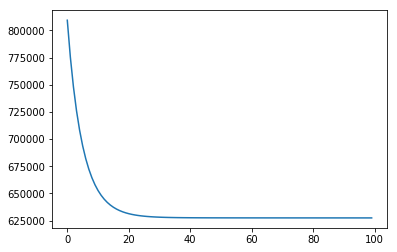

In [476]:
F = []
u_new = []
v_new = []
for i in range(100):
    U = U - (0.00001 * gradient_wrt_u(new_rating_data,1,U,V))
    V = V - (0.00001 * gradient_wrt_v(new_rating_data,1,U,V))
    v_new.append(V)
    u_new.append(U)
    F.append(compute_f(new_rating_data,1,U,V))
plt.plot(range(100),F)

# Summary of the finding 
## The obejctive function converges to a minima when U and V are updated
## The learning 0.00001 is enough for convergence as we can see in the plot that the curve converges at 20 iterations

In [477]:
u_final = u_new[-1]
v_final = v_new[-1]

In [478]:
# Defining the RMSE function 

In [479]:
def rmse(test_indices,M,final_U,final_V):
    ans = 0
    for i,j in test_indices:
        ans = ans + np.power(M[i][j] - np.dot(final_U[i],np.transpose(final_V[j])),2)
    result = np.sqrt(1/len(test_indices)*ans)
    return result

In [480]:
# Plotting the RMSE value for the training 

In [481]:
print('RMSE',rmse(index_list_test,new_rating_data,u_final,v_final))

RMSE 3.6601865564267912


# Calcualting the RMSE for the list of lamda given in the question 

In [482]:
lamda_list = [0.000001,0.001,0.1,0.5,2,5,10,20,100,500,1000]
rmse_list_all = []
u_final = []
v_final = []
for i in lamda_list:
    U = np.random.randn(610,5)
    V = np.random.randn(9724,5)
    v_new = []
    u_new = []
    for i in range(100):
        U = U - (0.00001 * gradient_wrt_u(new_rating_data,1,U,V))
        V = V - (0.00001 * gradient_wrt_v(new_rating_data,1,U,V))
        v_new.append(V)
        u_new.append(U)
    u_final.append(u_new[-1])
    v_final.append(v_new[-1])

In [483]:
for u,v in zip(u_final,v_final):
    rmse_list_all.append(rmse(index_list_test,new_rating_data,u,v))

In [484]:
rmse_list_all

[3.660145112394827,
 3.660212368062719,
 3.659252964061493,
 3.659717700598094,
 3.659761284915995,
 3.6601015118826723,
 3.6599441092839897,
 3.659668850878857,
 3.660096402932641,
 3.6596161397064875,
 3.659877664785971]

# Plotting the RMSE values against different lamda values mentioned in the question

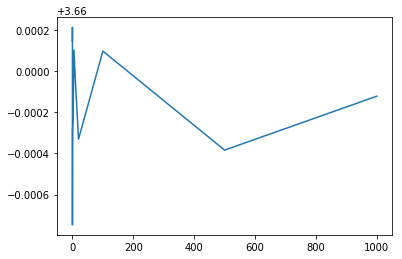

In [485]:
plt.plot(lamda_list,rmse_list_all)

# Inference
## the value of lambda controls the regularization of the model
## Since the value of lamda is low the value of RMSE is comparitvely very high